In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [21]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

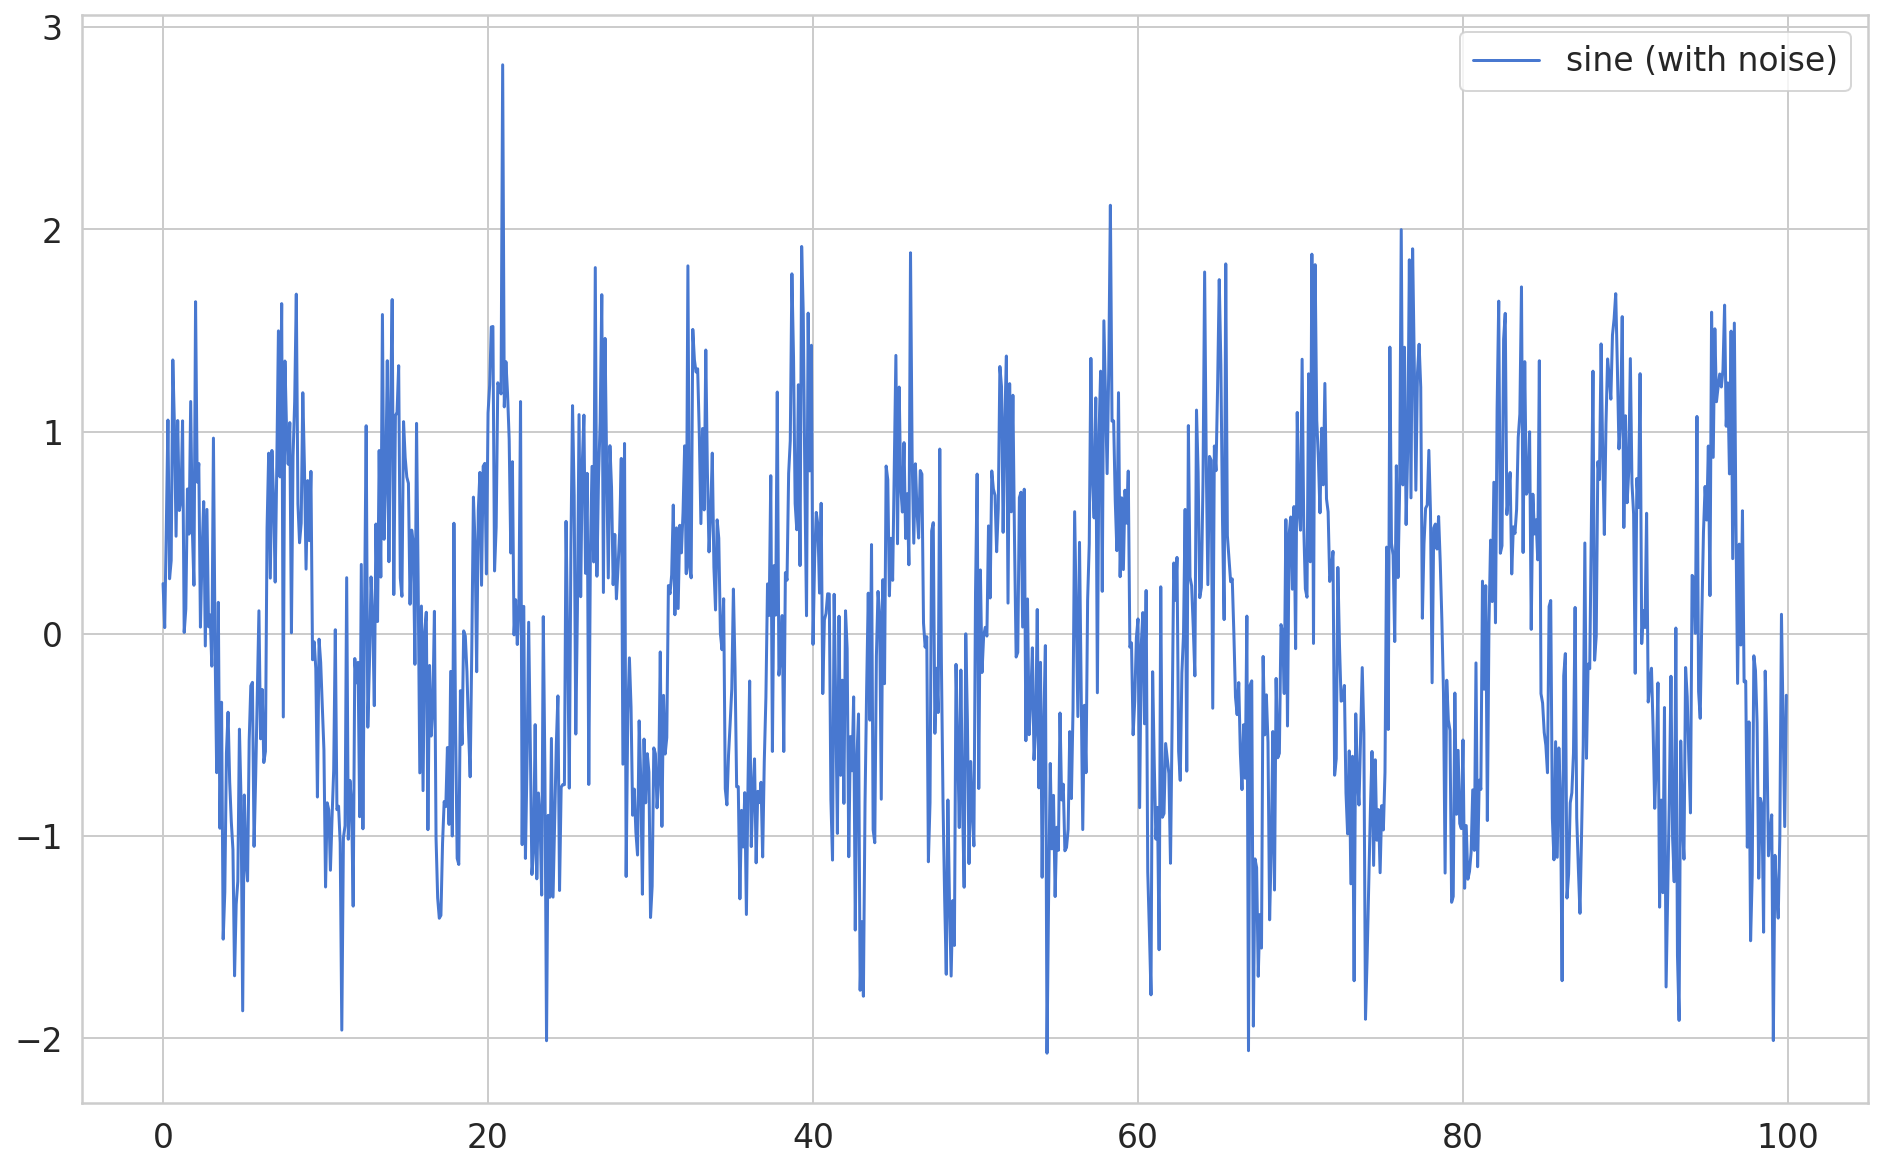

In [60]:
plt.plot(time, sin, label='sine (with noise)');
plt.legend();

# Data Preprocessing

In [61]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head(11)

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342
0.5,0.362357
0.6,1.354249
0.7,1.027935
0.8,0.482619
0.9,1.054607


In [58]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [91]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [96]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)
print(X_train.shape[2])

(790, 10, 1) (790,)
1


# Modeling

In [68]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

## Training

In [28]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=1, 
    shuffle=False
)

Train on 711 samples, validate on 79 samples
Epoch 1/30
711/711 [==============================] - 4s 6ms/sample - loss: 0.4394 - val_loss: 0.3740
Epoch 2/30
711/711 [==============================] - 1s 2ms/sample - loss: 0.3324 - val_loss: 0.3310
Epoch 3/30
711/711 [==============================] - 1s 2ms/sample - loss: 0.3219 - val_loss: 0.3254
Epoch 4/30
711/711 [==============================] - 1s 2ms/sample - loss: 0.3199 - val_loss: 0.3217
Epoch 5/30
711/711 [==============================] - 1s 2ms/sample - loss: 0.3184 - val_loss: 0.3191
Epoch 6/30
711/711 [==============================] - 1s 2ms/sample - loss: 0.3173 - val_loss: 0.3171
Epoch 7/30
711/711 [==============================] - 1s 2ms/sample - loss: 0.3165 - val_loss: 0.3154
Epoch 8/30
711/711 [==============================] - 1s 2ms/sample - loss: 0.3157 - val_loss: 0.3140
Epoch 9/30
711/711 [==============================] - 1s 2ms/sample - loss: 0.3150 - val_loss: 0.3126
Epoch 10/30
711/711 [================

## Evaluation

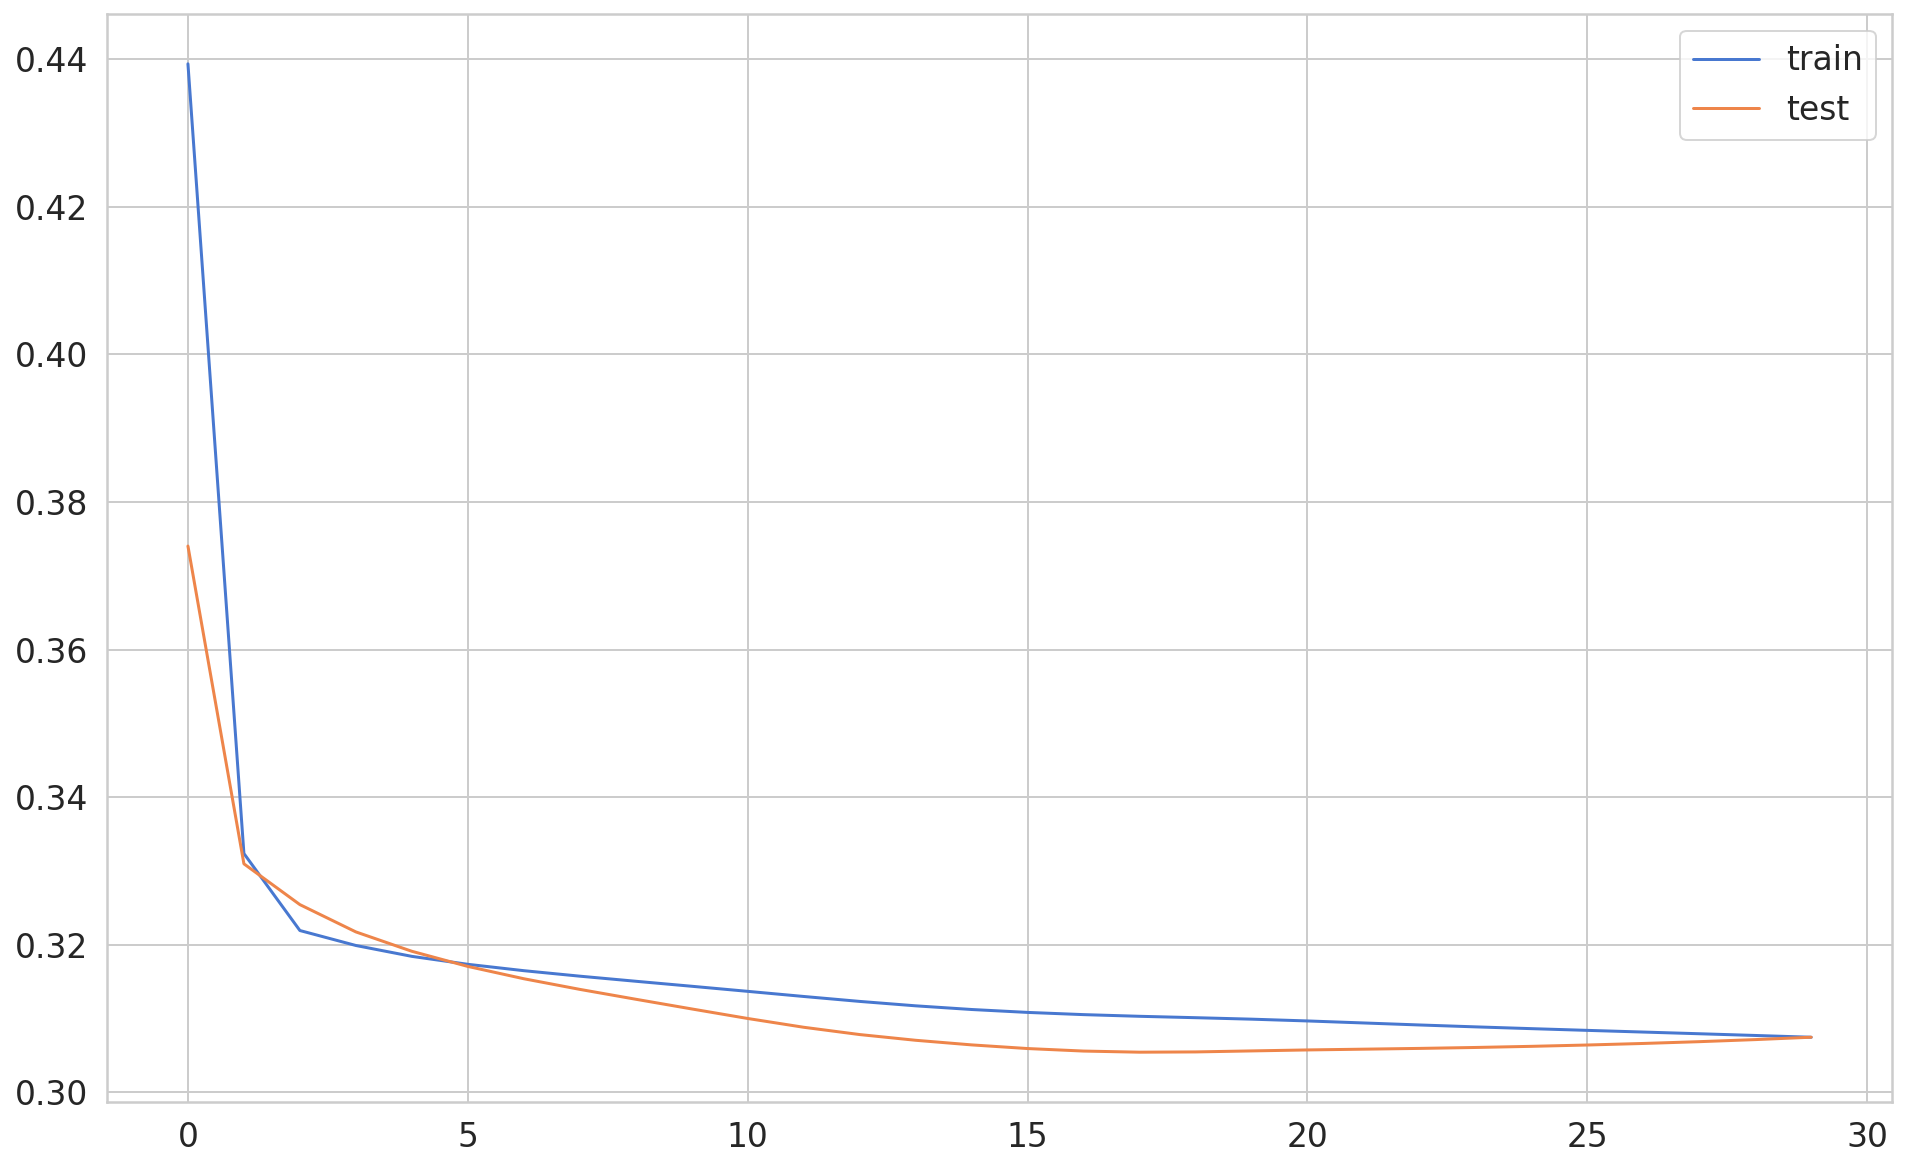

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [97]:
y_pred = model.predict(X_test)

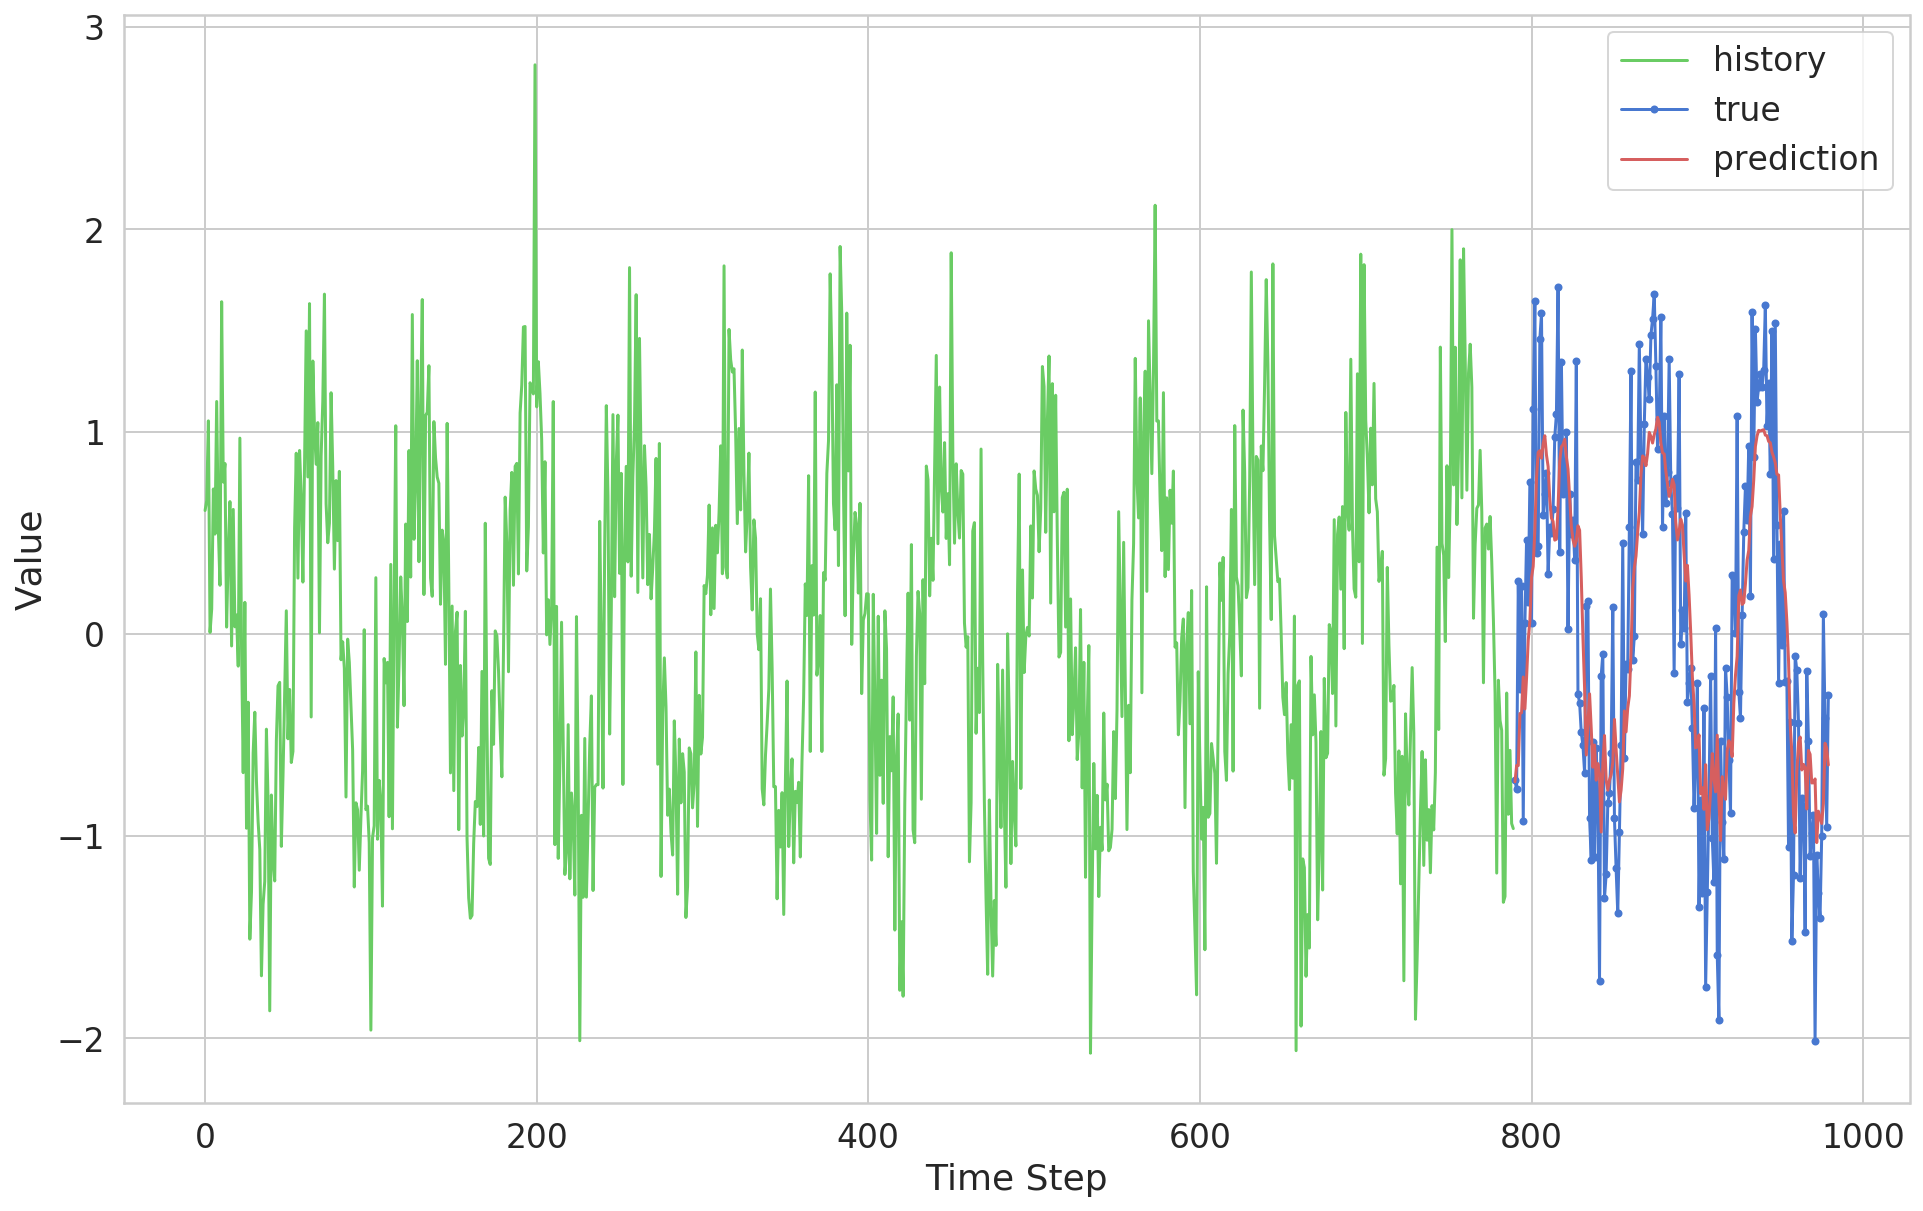

In [31]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

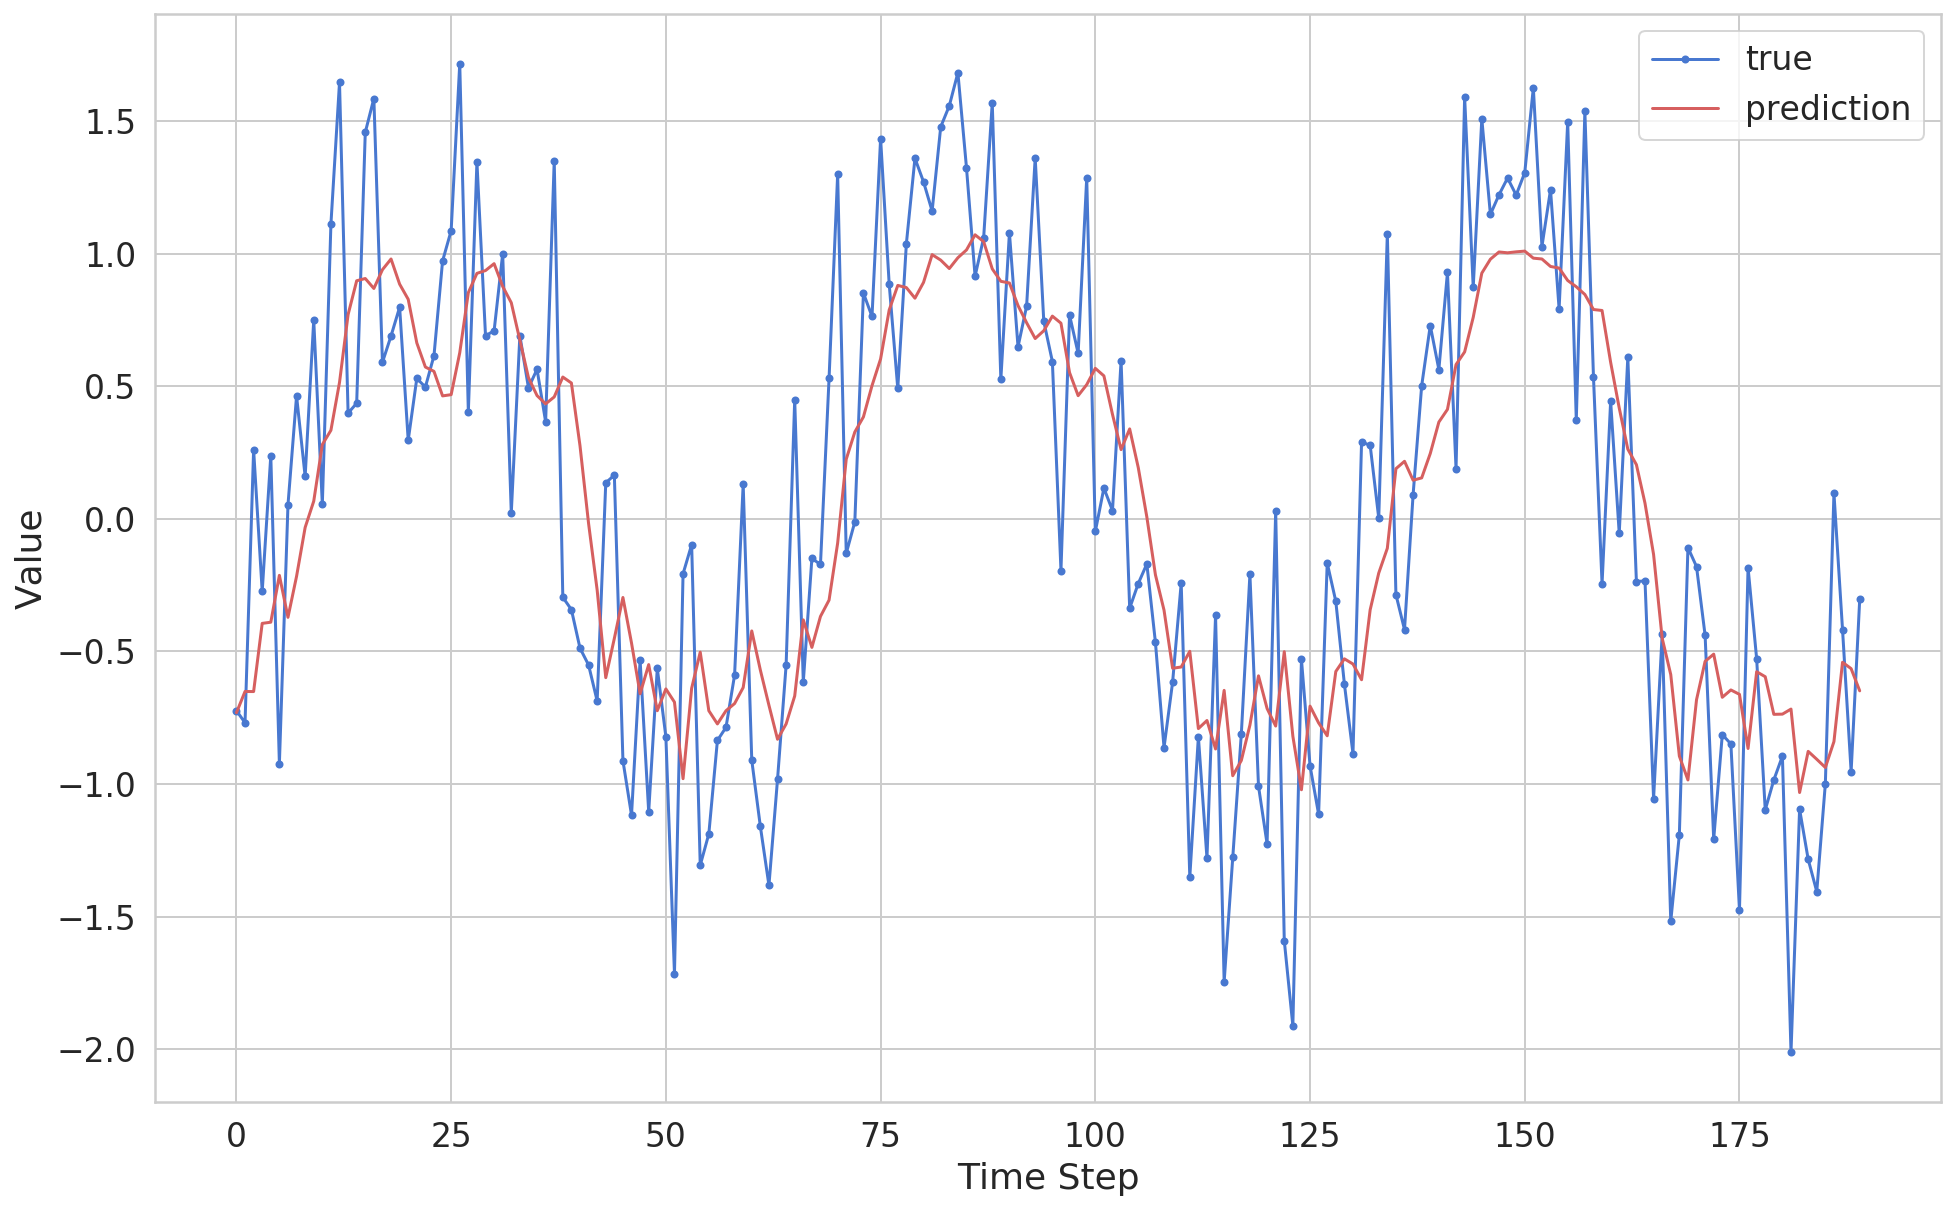

In [32]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();